In [1]:
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import sys
import importlib

sys.path.append("..")

import pickle
from autogenes import AutoGenes

In [2]:
%load_ext autoreload
%autoreload 1
%aimport autogenes

In [3]:
importlib.reload(autogenes)

<module 'autogenes' from '/home/maxim/.local/lib/python3.7/site-packages/autogenes/__init__.py'>

In [4]:
bulkdata = pd.read_csv('../datasets/GSE75748_bulk_data.csv',index_col='index')
bulkdata = bulkdata.T
#bulkdata = bulkdata.drop(bulkdata.columns[20:], axis=1)
bulkdata.head()


index,CD109,CD163,PHYHIPL,OR9A4,CDH1,TMIE,APOA2,GAGE12D,USP29,TTLL2,...,LRRC2,PDE11A,PFDN4,OPN5,DLC1,IFI44L,PRR23A,GDF9,DDA1,CCDC125
H1,0.155816,0.000010,0.004350,0.000022,1.885752,0.000446,0.001204,0.000000,0.009259,0.001220,...,0.388692,0.092628,0.920212,0.000021,0.032301,0.002657,0.047878,0.000157,0.123657,0.262672
DBC,0.137496,0.089907,0.088457,0.000000,0.428238,0.010872,1.045434,0.000000,0.010952,0.004461,...,0.522557,0.097860,0.656919,0.000364,1.677883,0.004834,0.052945,0.000160,0.222568,0.372195
EC,2.160324,0.004771,0.000000,0.000000,0.160532,0.001173,0.000000,0.000000,0.012504,0.016121,...,0.371620,0.115885,0.368386,0.188562,2.828626,0.006612,0.061515,0.000000,0.271337,0.350892
HFF,4.340601,0.000000,0.000000,0.000000,0.123398,0.001487,0.000000,0.000000,0.012213,0.000061,...,0.327675,0.080658,0.478675,0.000000,1.756251,0.083066,0.047503,0.000000,0.168979,0.368760
NPC,0.109122,0.000000,0.023976,0.000092,0.165340,0.000000,0.000000,0.000052,0.012914,0.000045,...,0.373989,0.155740,0.752287,0.000269,0.622852,0.016263,0.061429,0.000000,0.243662,0.460025


# General run

In [5]:
ag = AutoGenes(bulkdata)
ag.run(ngen=4)

gen	nevals	pareto	distance        	correlation 
0  	100   	4     	349.65 - 1219.75	2.16 - 14.73
1  	100   	4     	351.17 - 1219.75	2.16 - 14.73
2  	100   	9     	598.35 - 1219.75	2.16 - 14.32
3  	100   	11    	602.22 - 1222.07	2.16 - 13.64
4  	100   	9     	772.92 - 1222.07	2.13 - 13.63


In [6]:
ag.pareto

[IndividualGA([False, False, False, ..., False, False, False]),
 IndividualGA([False, False, False, ..., False, False, False]),
 IndividualGA([False, False, False, ..., False, False,  True]),
 IndividualGA([False,  True, False, ..., False, False, False]),
 IndividualGA([False, False, False, ..., False, False, False]),
 IndividualGA([False,  True, False, ..., False, False, False]),
 IndividualGA([False,  True, False, ..., False, False, False]),
 IndividualGA([False,  True, False, ..., False, False, False]),
 IndividualGA([False, False, False, ..., False, False, False])]

In [7]:
ag.print()

0: (1222.074375228556, 13.62877391808141)
1: (1220.900673938097, 13.620742328057776)
2: (1210.0008063395558, 13.379738078403934)
3: (1050.3994457320375, 2.8014607393345563)
4: (1049.453683684715, 2.7995081039628746)
5: (1048.9508181643573, 2.796831258964339)
6: (1048.8973061541049, 2.796119593315792)
7: (1048.8973061241852, 2.794416392830561)
8: (780.0772234539876, 2.1314724598501003)


In [6]:
ag.summary()

Pareto front contains 9 individuals
Objective 'distance':
Min: 780.08, Mean: 1075.52, Std: 129.71, Max: 1222.07
Objective 'correlation':
Min: 2.13, Mean: 6.31, Std: 5.12, Max: 13.63


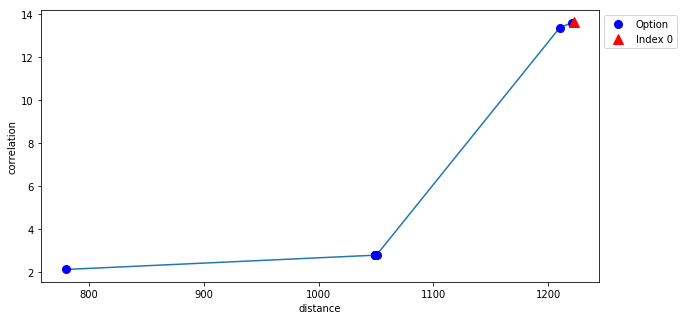

In [20]:
ag.plot(index=0)

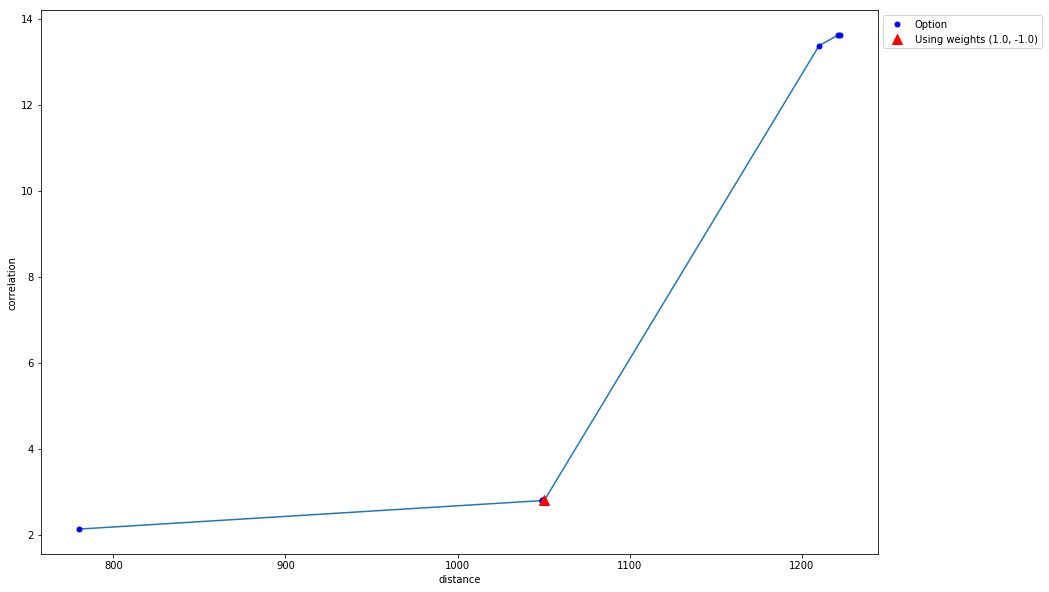

In [10]:
ag.plot(size='large')

# Three objectives

In [11]:
def num_genes(data):
    return data.shape[1]

In [12]:
ag = AutoGenes(bulkdata)
ag.run(weights=(1.0,-1.0,-1.0),objectives=('distance','correlation',num_genes))

gen	nevals	distance        	correlation 	num_genes    
0  	100   	349.65 - 1219.75	2.16 - 14.73	359.0 - 451.0
1  	100   	351.17 - 1219.75	2.16 - 14.73	359.0 - 454.0
2  	100   	351.17 - 1219.75	2.16 - 14.73	359.0 - 444.0
3  	100   	351.17 - 1219.75	2.16 - 14.05	359.0 - 444.0


In [13]:
ag.summary()

Pareto front contains 33 individuals
Objective 'distance':
Min: 551.69, Mean: 968.84, Std: 183.69, Max: 1219.75
Objective 'correlation':
Min: 2.16, Mean: 6.61, Std: 4.47, Max: 14.05
Objective 'num_genes':
Min: 359.0, Mean: 394.09, Std: 24.07, Max: 443.0


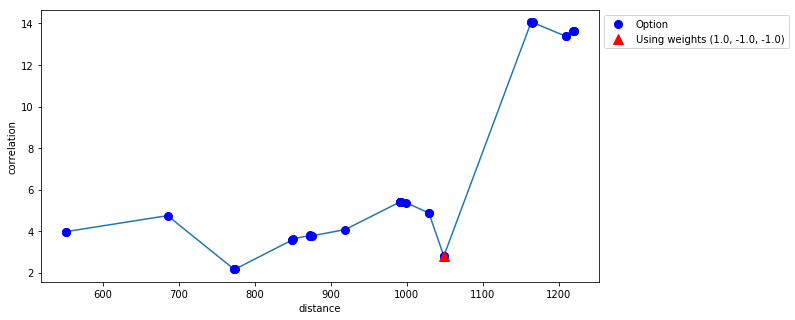

In [14]:
ag.plot()

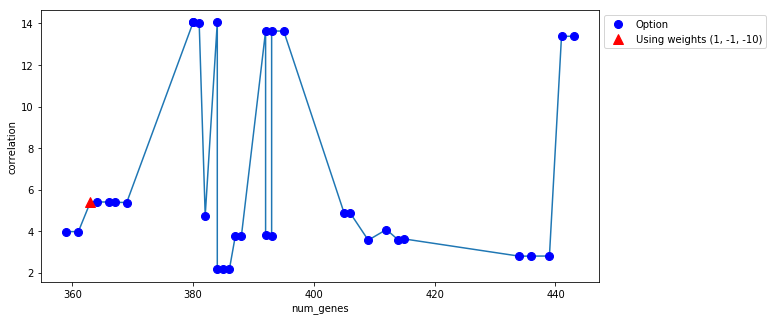

In [15]:
ag.plot(objectives=(2,1),weights=(1,-1,-10))

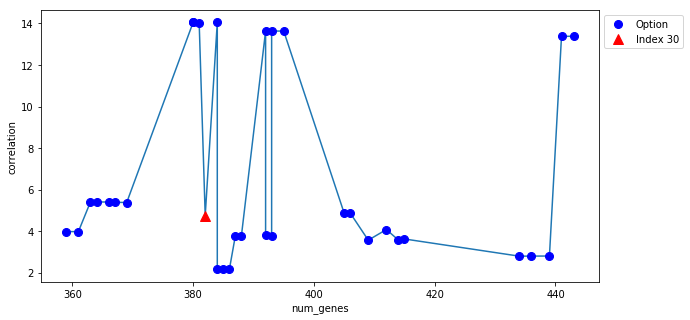

In [16]:
ag.plot(objectives=(2,1),index=30)

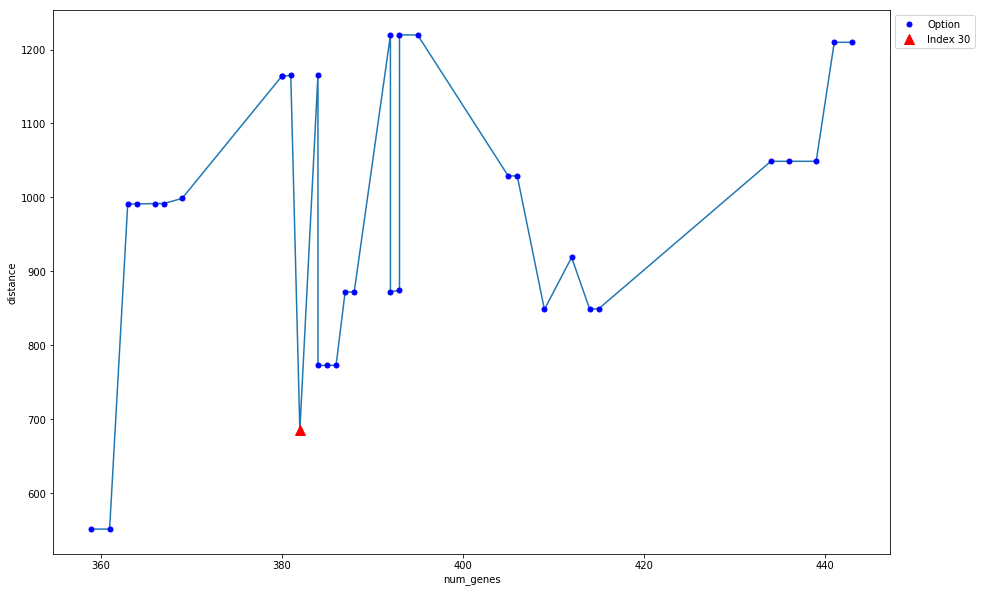

In [17]:
ag.plot(objectives=(2,0),index=30,size='large')

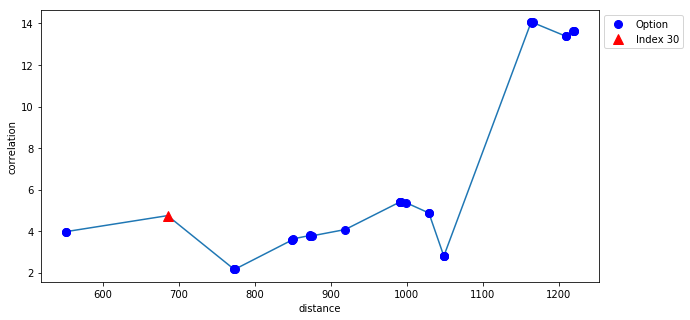

In [18]:
ag.plot(objectives=(0,1),index=30)